# Day 09 Group Worksheet
Oct 01, 2025

If you're working on CoCalc, it's good to rename your notebook with a fun group name and to include your names below so that you can easily find it later for reference.

* Group members:

## Electric Field Hockey tasks:
Today, your goal (pun intended) is to make sense of, fix and then update the functionality of the [Electric Field Hockey](https://phet.colorado.edu/en/simulations/electric-hockey) starter code provided below. **Read through all of the tasks below before starting to work on them** since you may not progress through them linearly.

### Starter code (there's an additional copy at the end of the notebook for reference)

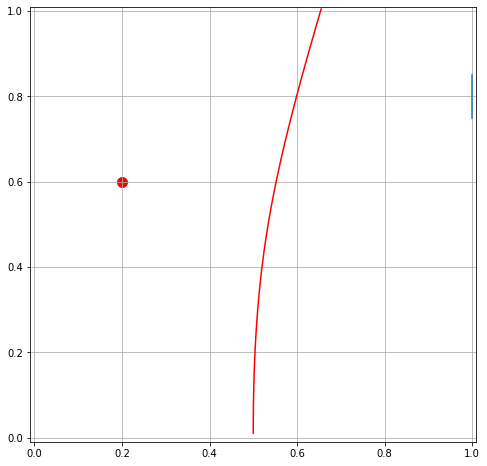

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Euler's method for ODE integration
def euler_method(initial_state, t_array):
    '''
    Variables defined outside of this function:
    - The constants k, q and m
    - The nested list fixed_charges
    '''
    
    x0, y0, vx0, vy0 = initial_state # Initial state vector for the moving charge

    x_array = np.zeros_like(t_array, dtype=float)
    y_array = np.zeros_like(t_array, dtype=float)
    vx_array = np.zeros_like(t_array, dtype=float)
    vy_array = np.zeros_like(t_array, dtype=float)

    # Set initial values
    x_array[0], y_array[0] = x0, y0
    vx_array[0], vy_array[0] = vx0, vy0
    
    for i in range(1, len(t_array)): # Start at i=1 since i=0 already filled

        # Quantities from the previous step; used for calculating next step quantities
        t = t_array[i-1], 
        dt = t_array[i] - t_array[i-1]
        x, y = x_array[i-1], y_array[i-1]
        vx, vy = vx_array[i-1], vy_array[i-1]
        
        # Determine net force on the moving charge
        fx, fy = 0, 0
        for fixed_charge in fixed_charges: # Coulomb's Law forces exerted on the moving charge
            x_fixed_charge, y_fixed_charge = fixed_charge[0], fixed_charge[1]
            sign_fixed_charge = fixed_charge[2]            
            r = np.sqrt((x-x_fixed_charge)**2 + (y-y_fixed_charge)**2)
            fx += k * q**2 / r**2 # Fix me! x-component needed
            fy += k * q**2 / r**2 # Fix me! y-component needed

        ax, ay = fx/m, fy/m

        x_array[i] = x + dt * vx
        y_array[i] = y + dt * vy
        vx_array[i] = vx + dt * ax
        vy_array[i] = vy + dt * ay
        
        if y_array[i] >= 1.: # Fix me! There should be additional break conditions
            break

    return t_array[:i+1], [ x_array[:i+1], y_array[:i+1], vx_array[:i+1], vy_array[:i+1] ]
        
'''
The main code area
'''
    
# Constants
k = 8.9875517923e9 # Coulomb's constant; N*m^2/C^2
q = 1e-6 # Base charge is 1 uC
m = 1e-3 # Base mass is 1 g

goal_dim = np.array([[.98, 1.],[.75, .85]])

# Initial state vector and fixed charge parameters
state0 = [0.5, 0.01, 0.0, 10.] # x0, y0, vx0, vy0
fixed_charges = [ [.2, .6, 'r'] ] # For each charge: x, y and sign of charge

# Times to be simulated
t0, tmax, dt = 0, 1, 0.001
t = np.arange(t0, tmax+dt, dt) # end is exclusive so we use end = tmax + dt

# Solve the system using Euler's method
sol_t, sol_results = euler_method(state0, t)
sol_x, sol_y, sol_vx, sol_vy = sol_results

# Extract the final conditions to check for a goal
x_final, y_final, t_final = sol_x[-1], sol_y[-1], sol_t[-1]

# Use the extracted final conditions to check for a goal
if x_final > 0.99 and goal_dim[1,0] <= y_final <= goal_dim[1,1]:
    goal_text = "Goal!"
else:
    goal_text = "No goal :("

    
'''
Plotting
'''

fig, ax = plt.subplots(figsize=(8, 8))

ax.plot([goal_dim[0,1], goal_dim[0,1]], [goal_dim[1,0], goal_dim[1,1]])

for fixed_charge in fixed_charges:
    x_fixed_charge, y_fixed_charge = fixed_charge[0], fixed_charge[1]
    sign_fixed_charge = fixed_charge[2]
    ax.scatter(x_fixed_charge, y_fixed_charge, color=sign_fixed_charge, s=100)

ax.plot(sol_x, sol_y, color='r')    
    
ax.set_xlim([-.01, 1.01])
ax.set_ylim([-.01, 1.01])

ax.grid(True)
plt.show()


### Example of target output for goal and no goal situations
You <u>do not</u> need to match the exact format and style of the example goal and no goal visualizations, but at minimum your visualizations should include information about the dimensions and units of the play area, as well as feedback embedded in the visualization regarding if a goal was scored or not.

The left panel below shows how the simulation should behave **when the Coulomb's Law code has been fixed**, while keeping the initial state as `state0 = [0.5, 0.01, 0.0, 10.]`. The right panel shows what a successful goal could look like with a correct implementation of Coulomb's Law and an appropriate update to `vy0`. 

<table border="0" cellspacing="0" cellpadding="0"><tr>
    <td><img src="https://i.ibb.co/4JnNyYm/no-goal.png" alt="No goal :("></td>
    <td><img src="https://i.ibb.co/0c4rytG/goal-unknown-vy0.png" alt="Goal!"></td>
</tr></table>

### Task 1. Make sense of the `fixed_charges` list
We will treat the moving charge and the initial fixed charge as each having positive charge. If we wanted to add a negative charge as a second fixed charge, we could updated our `fixed_charges` list to something along the lines of:
```python
fixed_charges = [ [.2, .6, 'r'], [.6, .2, 'b'] ] # Example of adding a second negative charge
```
How does the `fixed_charges` list of lists work? Where are all of the places in the code that this list is used? What is represented by each element in the list `[.2, .6, 'r']`? For example, what does `charge[0]` represent within the for loop `for fixed_charge in fixed_charges:`?

(Your notes)
* fixed_charge[0]: ...
* fixed_charge[1]: ...

### Task 2: Make sense of the parameters in the `euler_method()` function
Have a careful look at the `euler_method()` function and make sure you understand how the information used for each of the following variables is made available to the function, as well as how that information is used within the function

* x0: ...
* y0: ...
* vx0: ...
* vy0: ...
* k: ...
* q: ...
* m: ...

### Task 3: Make sense of the objects returned from the `euler_method()` functions
The format of the information returned by the `euler_method()` function is intended to match the format returned by `solve_ivp()`, a solver that we are going to learn next class. So the format may seem a bit odd, but it was chosen with this specific purpose.

Why is the slice `[:i+1]` being used when returning the arrays `t_array`, `x_array`, `y_array`, `vx_array`and `vy_array` from the `euler_method()` function?
```python
return t_array`[:i+1], [ x_array[:i+1], y_array[:i+1], vx_array[:i+1], vy_array[:i+1] ]
```

What information is stored in the returned objects `sol_t` and `sol_results`?
```python
sol_t, sol_results = euler_method(state0, t)
```

(Your notes)

- Note 1
- Note 2

### Task 4. Fix the Coulomb's Law code to be split into x- and y-components
Based on the graphical output, it may look like Coulomb's Law is implemented correctly, **but it is not**. Fix it in the code.

### Task 5. Update the visualization to include feedback of if a goal was scored or not
The starter code includes the `goal_text` variable to provide feedback related to if a goal was scored or not. Update the visualization to include the feedback provided by the `goal_text` variable. Also add your own personal details to the overall visualization to make it your own.

### Task 6. Score some goals!!!
Below we want you to score a goal by varying the initial conditions in a bunch of specified ways. 

***Bonus challenge***: See if you can build a function such that you only have to provide the initial conditions instead of copying the full code to each new cell, e.g., `run_simulation(state0, fixed_charges, ...)

#### a) Starting with the original initial parameters and charge locations, score a goal by changing only the initial speed of the moving charge

In [2]:
# Your 6a code



#### b) Starting with the original initial parameters and charge locations, score a goal by the initial direction, but not initial speed of the moving charge

In [3]:
# Your 6b code



#### c) Starting with the original initial parameters and charge locations, score a goal by changing only the position of the fixed charge

In [4]:
# Your 6c code



#### d) Starting with the original initial parameters and charge locations, score a goal by changing sign of the fixed charge and then moving the fixed charge to an appropriate location

In [5]:
# Your 6d code



#### e) Starting with the original initial parameters and charge locations, score a goal by adding a second fixed charge of either sign

In [6]:
# Your 6e code



## Backup copy of starter code

```python
import numpy as np
import matplotlib.pyplot as plt

# Euler's method for ODE integration
def euler_method(initial_state, t_array):
    '''
    Variables defined outside of this function:
    - The constants k, q and m
    - The nested list fixed_charges
    '''
    
    x0, y0, vx0, vy0 = initial_state # Initial state vector for the moving charge

    x_array = np.zeros_like(t_array, dtype=float)
    y_array = np.zeros_like(t_array, dtype=float)
    vx_array = np.zeros_like(t_array, dtype=float)
    vy_array = np.zeros_like(t_array, dtype=float)

    # Set initial values
    x_array[0], y_array[0] = x0, y0
    vx_array[0], vy_array[0] = vx0, vy0
    
    for i in range(1, len(t_array)): # Start at i=1 since i=0 already filled

        # Quantities from the previous step; used for calculating next step quantities
        t = t_array[i-1], 
        dt = t_array[i] - t_array[i-1]
        x, y = x_array[i-1], y_array[i-1]
        vx, vy = vx_array[i-1], vy_array[i-1]
        
        # Determine net force on the moving charge
        fx, fy = 0, 0
        for fixed_charge in fixed_charges: # Coulomb's Law forces exerted on the moving charge
            x_fixed_charge, y_fixed_charge = fixed_charge[0], fixed_charge[1]
            sign_fixed_charge = fixed_charge[2]            
            r = np.sqrt((x-x_fixed_charge)**2 + (y-y_fixed_charge)**2)
            fx += k * q**2 / r**2 # Fix me! x-component needed
            fy += k * q**2 / r**2 # Fix me! y-component needed

        ax, ay = fx/m, fy/m

        x_array[i] = x + dt * vx
        y_array[i] = y + dt * vy
        vx_array[i] = vx + dt * ax
        vy_array[i] = vy + dt * ay
        
        if y_array[i] >= 1.: # Fix me! There should be additional break conditions
            break

    return t_array[:i+1], [ x_array[:i+1], y_array[:i+1], vx_array[:i+1], vy_array[:i+1] ]
        
'''
The main code area
'''
    
# Constants
k = 8.9875517923e9 # Coulomb's constant; N*m^2/C^2
q = 1e-6 # Base charge is 1 uC
m = 1e-3 # Base mass is 1 g

goal_dim = np.array([[.98, 1.],[.75, .85]])

# Initial state vector and fixed charge parameters
state0 = [0.5, 0.01, 0.0, 10.] # x0, y0, vx0, vy0
fixed_charges = [ [.2, .6, 'r'] ] # For each charge: x, y and sign of charge

# Times to be simulated
t0, tmax, dt = 0, 1, 0.001
t = np.arange(t0, tmax+dt, dt) # end is exclusive so we use end = tmax + dt

# Solve the system using Euler's method
sol_t, sol_results = euler_method(state0, t)
sol_x, sol_y, sol_vx, sol_vy = sol_results

# Extract the final conditions to check for a goal
x_final, y_final, t_final = sol_x[-1], sol_y[-1], sol_t[-1]

# Use the extracted final conditions to check for a goal
if x_final > 0.99 and goal_dim[1,0] <= y_final <= goal_dim[1,1]:
    goal_text = "Goal!"
else:
    goal_text = "No goal :("

    
'''
Plotting
'''

fig, ax = plt.subplots(figsize=(8, 8))

ax.plot([goal_dim[0,1], goal_dim[0,1]], [goal_dim[1,0], goal_dim[1,1]])

for fixed_charge in fixed_charges:
    x_fixed_charge, y_fixed_charge = fixed_charge[0], fixed_charge[1]
    sign_fixed_charge = fixed_charge[2]
    ax.scatter(x_fixed_charge, y_fixed_charge, color=sign_fixed_charge, s=100)

ax.plot(sol_x, sol_y, color='r')

ax.set_xlim([-.01, 1.01])
ax.set_ylim([-.01, 1.01])

ax.grid(True)
plt.show()
```